In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [21]:
pho = pd.read_csv("phoneme.csv")
X = np.array(pho['Iy']).reshape(-1, 1)
y = np.array(pho['class']).reshape(-1, 1)

In [22]:
# scaling and split
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    shuffle=True, random_state=42)

In [23]:
print(pho.shape)
print(y)

(5404, 6)
[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [1]]


In [24]:
pho.head()

,Aa,Ao,Dcl,Iy,Sh,class
0,1.240,0.875,-0.205,-0.078,0.067,0
1,0.268,1.352,1.035,-0.332,0.217,0
2,1.567,0.867,1.300,1.041,0.559,0
3,0.279,0.990,2.555,-0.738,0.000,0
4,0.307,1.272,2.656,-0.946,-0.467,0


In [25]:
pho.describe()

,Aa,Ao,Dcl,Iy,Sh,class
count,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000
mean,0.818957,1.258802,0.764732,0.398743,0.078619,0.293486
std,0.858733,0.851057,0.925436,0.796531,0.575624,0.455401
min,-1.700000,-1.327000,-1.823000,-1.581000,-1.284000,0.000000
25%,0.243750,0.596000,-0.115000,-0.205000,-0.232250,0.000000
50%,0.492500,1.075500,0.729000,0.285500,-0.044000,0.000000
75%,1.089250,1.866250,1.484000,0.937000,0.196250,1.000000
max,4.107000,4.378000,3.199000,2.826000,2.719000,1.000000


In [26]:
# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

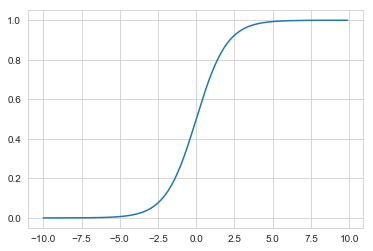

In [27]:
sigmoid_x = np.arange(-10, 10, 0.1)
sigmoid_y = sigmoid(sigmoid_x)
plt.plot(sigmoid_x, sigmoid_y)

In [39]:
# learning
clf = LogisticRegression(penalty='l2', C=100, random_state=42)
clf.fit(X, y)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

C:\Users\Owner\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
# show probability
for i in range(5):
    print(round(y_proba[i, 0], 3), round(y_proba[i, 1], 3))

0.84 0.16
0.882 0.118
0.642 0.358
0.751 0.249
0.71 0.29


In [41]:
# evaluation
confusion_matrix(y_test, y_pred)

array([[1081,   73],
       [ 365,  103]], dtype=int64)

In [42]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 0.7299630086313194


In [43]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.94      0.83      1154
           1       0.59      0.22      0.32       468

   micro avg       0.73      0.73      0.73      1622
   macro avg       0.67      0.58      0.58      1622
weighted avg       0.70      0.73      0.68      1622



In [44]:
# analyze results
print('y = {} * x + {}'.format(clf.coef_, clf.intercept_))

y = [[0.75277878]] * x + [-0.97969965]


In [45]:
coef_pho = pho.DataFrame([phoneme.feature_names,
                        clf.coef_.flatten()], index=['features', 'coef']).T

AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [20]:
plt.figure(dpi=100)
sns.barplot(x=coef_df['coef'], y=coef_df['features'])
plt.tight_layout()

NameError: name 'coef_df' is not defined

<Figure size 600x400 with 0 Axes>

In [49]:
logreg = LogisticRegression()
# 交差検証
scores = cross_val_score(logreg, pho.Iy, pho.class)

SyntaxError: invalid syntax (<ipython-input-49-770fd481f19a>, line 3)

In [50]:
print('Cross-Validation scores: {}'.format(scores))

NameError: name 'scores' is not defined

In [51]:
print('Average score: {}'.format(np.mean(scores)))

NameError: name 'scores' is not defined